<a href="https://colab.research.google.com/github/SaraiLorenzo/Analisis-y-visualizacion-de-datos/blob/main/Estadistica_con_R_Practica_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Estadística con R — Práctica Completa
**Especialista en Análisis de Datos**

Este notebook cubre los temas del curso:
- **Módulo 1:** Estadística Descriptiva (métricas de resumen, visualización, frecuencias)
- **Módulo 2:** Estadística Inferencial (pruebas de hipótesis, intervalos de confianza, modelos)

---

## 🔧 Configuración Inicial — Instalación y Carga de Paquetes

In [1]:
# Instalar paquetes si no están disponibles
paquetes <- c("ggplot2", "dplyr", "tidyr", "scales", "ggthemes")
instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]
if (length(instalar) > 0) install.packages(instalar, quiet = TRUE)

# Cargar librerías
library(ggplot2)
library(dplyr)
library(tidyr)
library(scales)

# Configuración global de gráficos
theme_set(theme_minimal(base_size = 13))
set.seed(42)  # Reproducibilidad

cat("✅ Paquetes cargados correctamente\n")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




✅ Paquetes cargados correctamente


## 📦 Generación del Dataset de Práctica

Simulamos un dataset de **200 empleados** con variables continuas y categóricas.

In [2]:
n <- 200

df <- data.frame(
  id          = 1:n,
  edad        = round(rnorm(n, mean = 35, sd = 8)),
  salario     = round(rnorm(n, mean = 45000, sd = 12000)),
  experiencia = round(runif(n, min = 0, max = 20)),
  departamento = sample(c("Ventas", "TI", "RRHH", "Finanzas"), n, replace = TRUE,
                        prob = c(0.35, 0.30, 0.20, 0.15)),
  genero      = sample(c("Masculino", "Femenino"), n, replace = TRUE),
  satisfaccion = sample(1:5, n, replace = TRUE, prob = c(0.05, 0.10, 0.25, 0.40, 0.20))
)

# Introducir algunos valores NA para practicar limpieza
df$salario[sample(1:n, 8)] <- NA

# Vista previa
head(df, 8)

,id,edad,salario,experiencia,departamento,genero,satisfaccion
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,1,33,NA,0,Ventas,Masculino,2
2,2,14,62721,7,Ventas,Femenino,5
3,3,15,42396,12,TI,Femenino,4
4,4,46,29597,12,TI,Masculino,5
5,5,33,49628,5,Finanzas,Femenino,4
6,6,21,40782,14,TI,Femenino,1
7,7,34,38738,19,TI,Femenino,4
8,8,45,32182,0,Ventas,Femenino,4


---
# 🧹 Módulo 0 — Limpieza y EDA Inicial

### Pipeline: Limpieza → EDA → Supuestos → Inferencia → Reporte

In [3]:
# --- Inspección general ---
cat("Dimensiones:", dim(df), "\n")
cat("Valores NA por columna:\n")
print(colSums(is.na(df)))

# --- Manejo de NAs: imputar con la mediana ---
df$salario[is.na(df$salario)] <- median(df$salario, na.rm = TRUE)

cat("\n✅ NAs después de la imputación:", sum(is.na(df)), "\n")

# --- Tipos de datos ---
str(df)

Dimensiones: 200 7 
Valores NA por columna:
          id         edad      salario  experiencia departamento       genero 
           0            0            8            0            0            0 
satisfaccion 
           0 

✅ NAs después de la imputación: 0 
'data.frame':	200 obs. of  7 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ edad        : num  33 14 15 46 33 21 34 45 50 32 ...
 $ salario     : num  44735 62721 42396 29597 49628 ...
 $ experiencia : num  0 7 12 12 5 14 19 0 16 16 ...
 $ departamento: chr  "Ventas" "Ventas" "TI" "TI" ...
 $ genero      : chr  "Masculino" "Femenino" "Femenino" "Masculino" ...
 $ satisfaccion: int  2 5 4 5 4 1 4 4 3 4 ...


---
# 📐 Módulo 1 — Estadística Descriptiva
## 1.1 Métricas de Tendencia Central y Dispersión

In [4]:
# ============================================================
#   TENDENCIA CENTRAL
# ============================================================
cat("=== EDAD ===\n")
cat("Media:          ", round(mean(df$edad), 2), "\n")
cat("Mediana:        ", median(df$edad), "\n")
cat("Moda:           ", as.integer(names(which.max(table(df$edad)))), "\n")

cat("\n=== SALARIO ===\n")
cat("Media:          ", round(mean(df$salario), 2), "\n")
cat("Mediana:        ", median(df$salario), "\n")

# ============================================================
#   DISPERSIÓN
# ============================================================
cat("\n=== DISPERSIÓN (Salario) ===\n")
cat("Varianza:               ", round(var(df$salario), 2), "\n")
cat("Desv. Estándar:         ", round(sd(df$salario), 2), "\n")
cat("Rango Intercuartílico:  ", IQR(df$salario), "\n")
cat("Mínimo - Máximo:        ", min(df$salario), "-", max(df$salario), "\n")

# ============================================================
#   RESUMEN COMPLETO
# ============================================================
cat("\n=== SUMMARY() ===\n")
summary(df[, c("edad", "salario", "experiencia", "satisfaccion")])

=== EDAD ===
Media:           34.41 
Mediana:         35 
Moda:            36 

=== SALARIO ===
Media:           45053.84 
Mediana:         44735 

=== DISPERSIÓN (Salario) ===
Varianza:                120371301 
Desv. Estándar:          10971.39 
Rango Intercuartílico:   15338.25 
Mínimo - Máximo:         12601 - 74515 

=== SUMMARY() ===


      edad          salario       experiencia      satisfaccion  
 Min.   :11.00   Min.   :12601   Min.   : 0.000   Min.   :1.000  
 1st Qu.:29.00   1st Qu.:37348   1st Qu.: 4.000   1st Qu.:3.000  
 Median :35.00   Median :44735   Median : 9.000   Median :4.000  
 Mean   :34.41   Mean   :45054   Mean   : 9.525   Mean   :3.605  
 3rd Qu.:40.00   3rd Qu.:52686   3rd Qu.:15.000   3rd Qu.:4.000  
 Max.   :57.00   Max.   :74515   Max.   :20.000   Max.   :5.000  

## 1.2 Visualización con ggplot2
### Histograma — Distribución de Edades

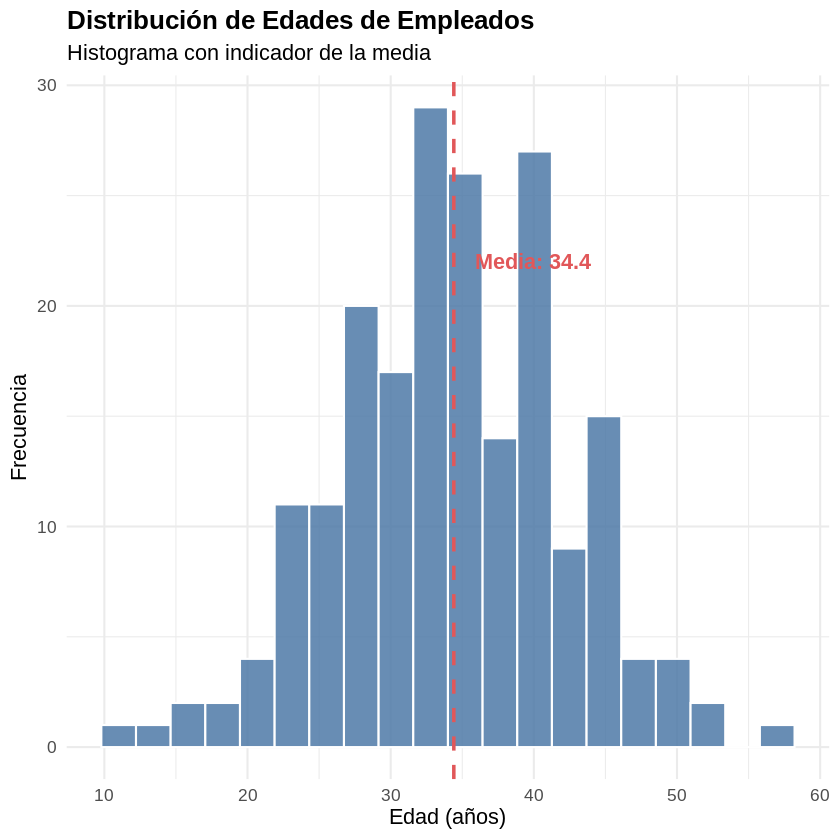

In [5]:
ggplot(df, aes(x = edad)) +
  geom_histogram(bins = 20, fill = "#4E79A7", color = "white", alpha = 0.85) +
  geom_vline(aes(xintercept = mean(edad)), color = "#E15759", linetype = "dashed",
             linewidth = 1, show.legend = TRUE) +
  annotate("text", x = mean(df$edad) + 1.5, y = 22,
           label = paste("Media:", round(mean(df$edad), 1)),
           color = "#E15759", fontface = "bold", hjust = 0) +
  labs(title = "Distribución de Edades de Empleados",
       subtitle = "Histograma con indicador de la media",
       x = "Edad (años)", y = "Frecuencia") +
  theme(plot.title = element_text(face = "bold"))

### Boxplot — Salario por Departamento (Detección de Outliers)

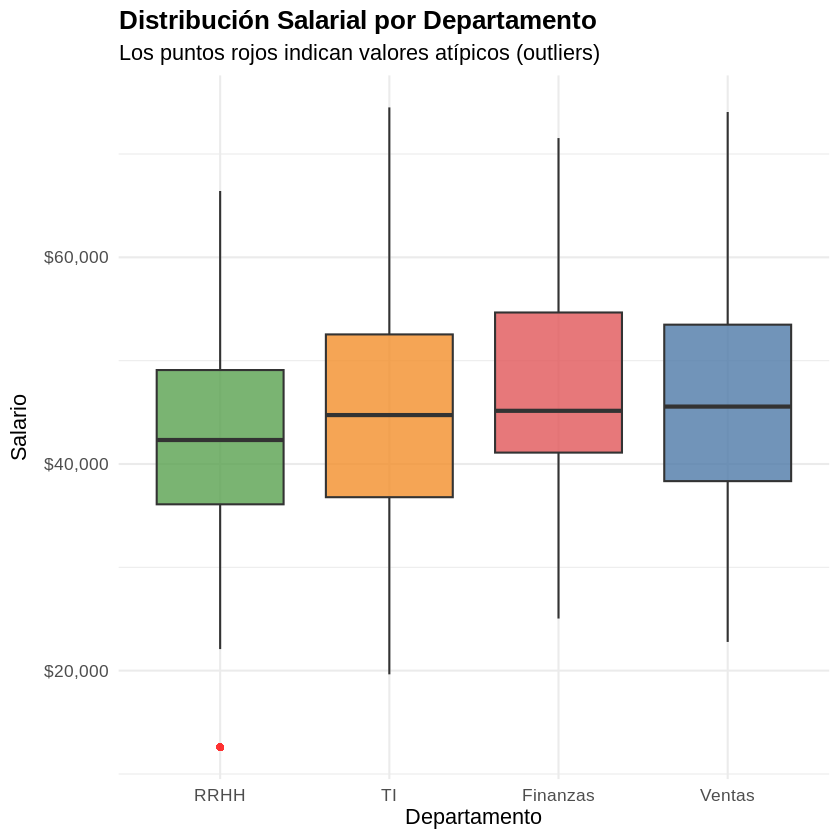

In [6]:
ggplot(df, aes(x = reorder(departamento, salario, median), y = salario, fill = departamento)) +
  geom_boxplot(alpha = 0.8, outlier.color = "red", outlier.shape = 16, outlier.size = 2) +
  scale_fill_manual(values = c("Ventas" = "#4E79A7", "TI" = "#F28E2B",
                                "RRHH" = "#59A14F", "Finanzas" = "#E15759")) +
  scale_y_continuous(labels = scales::dollar_format(prefix = "$", big.mark = ",")) +
  labs(title = "Distribución Salarial por Departamento",
       subtitle = "Los puntos rojos indican valores atípicos (outliers)",
       x = "Departamento", y = "Salario", fill = NULL) +
  theme(plot.title = element_text(face = "bold"), legend.position = "none")

### Curva de Densidad — Salario vs. Distribución Normal Teórica

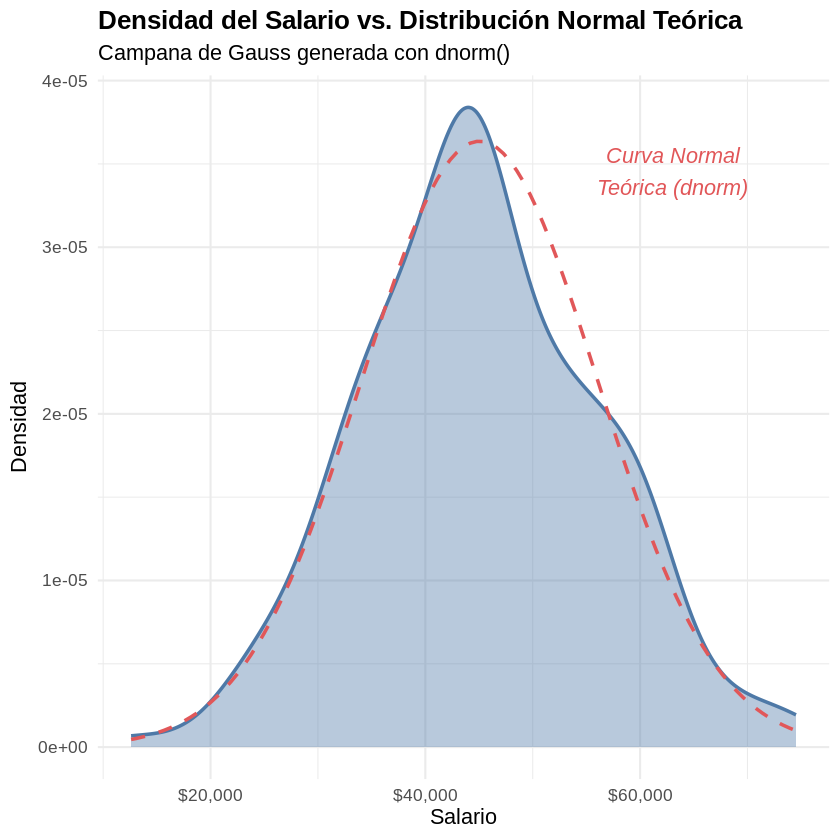

In [7]:
mu_sal  <- mean(df$salario)
sd_sal  <- sd(df$salario)

ggplot(df, aes(x = salario)) +
  geom_density(fill = "#4E79A7", alpha = 0.4, color = "#4E79A7", linewidth = 1) +
  stat_function(fun = dnorm, args = list(mean = mu_sal, sd = sd_sal),
                color = "#E15759", linetype = "dashed", linewidth = 1) +
  annotate("text", x = mu_sal + 18000, y = max(density(df$salario)$y) * 0.9,
           label = "Curva Normal\nTeórica (dnorm)", color = "#E15759", fontface = "italic") +
  scale_x_continuous(labels = scales::dollar_format(prefix = "$", big.mark = ",")) +
  labs(title = "Densidad del Salario vs. Distribución Normal Teórica",
       subtitle = "Campana de Gauss generada con dnorm()",
       x = "Salario", y = "Densidad") +
  theme(plot.title = element_text(face = "bold"))

## 1.3 Análisis de Frecuencias — Variables Categóricas

=== Frecuencias Absolutas — Departamento ===

Finanzas     RRHH       TI   Ventas 
      30       42       62       66 

=== Frecuencias Relativas (%) ===

Finanzas     RRHH       TI   Ventas 
      15       21       31       33 


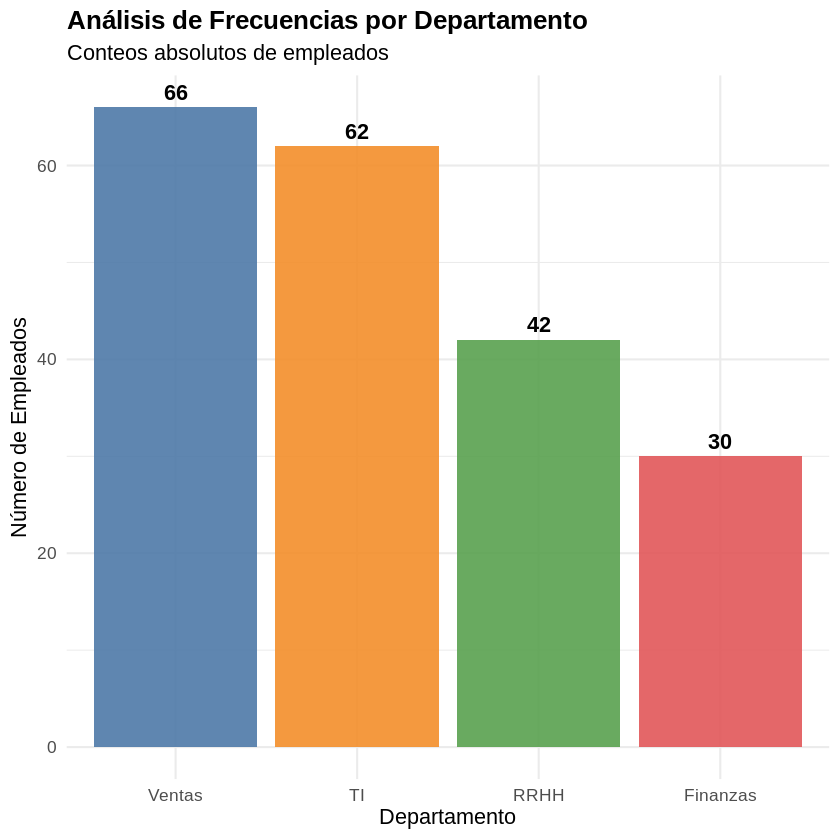

In [8]:
# Tabla de frecuencias
cat("=== Frecuencias Absolutas — Departamento ===\n")
freq_abs <- table(df$departamento)
print(freq_abs)

cat("\n=== Frecuencias Relativas (%) ===\n")
print(round(prop.table(freq_abs) * 100, 1))

# Gráfico de barras
df_freq <- as.data.frame(freq_abs)
names(df_freq) <- c("departamento", "conteo")

ggplot(df_freq, aes(x = reorder(departamento, -conteo), y = conteo, fill = departamento)) +
  geom_col(alpha = 0.9, show.legend = FALSE) +
  geom_text(aes(label = conteo), vjust = -0.5, fontface = "bold") +
  scale_fill_manual(values = c("Ventas" = "#4E79A7", "TI" = "#F28E2B",
                                "RRHH" = "#59A14F", "Finanzas" = "#E15759")) +
  labs(title = "Análisis de Frecuencias por Departamento",
       subtitle = "Conteos absolutos de empleados",
       x = "Departamento", y = "Número de Empleados") +
  theme(plot.title = element_text(face = "bold"))

---
# 🔬 Módulo 2 — Estadística Inferencial
## 2.1 Verificación de Supuestos — Prueba de Normalidad (Shapiro-Wilk)

In [9]:
# Shapiro-Wilk requiere n <= 5000; usamos una muestra
muestra_salario <- sample(df$salario, 50)

shapiro_resultado <- shapiro.test(muestra_salario)
cat("=== Prueba de Normalidad Shapiro-Wilk ===\n")
print(shapiro_resultado)

cat("\nInterpretación: ")
if (shapiro_resultado$p.value > 0.05) {
  cat("p =", round(shapiro_resultado$p.value, 4), "> 0.05\n")
  cat("✅ No rechazamos H0 → Los datos siguen una distribución normal.\n")
} else {
  cat("p =", round(shapiro_resultado$p.value, 4), "≤ 0.05\n")
  cat("❌ Rechazamos H0 → Los datos NO siguen una distribución normal.\n")
}

# Q-Q Plot
qqplot_data <- qqnorm(muestra_salario, plot.it = FALSE)
qqplot_df   <- data.frame(teorico = qqplot_data$x, muestral = qqplot_data$y)

ggplot(qqplot_df, aes(x = teorico, y = muestral)) +
  geom_point(color = "#4E79A7", alpha = 0.7, size = 2) +
  geom_qq_line(data = data.frame(sample = muestra_salario),
               aes(sample = sample), color = "#E15759", linewidth = 1) +
  labs(title = "Q-Q Plot — Salario vs. Distribución Normal",
       subtitle = "Los puntos deben seguir la línea roja si los datos son normales",
       x = "Cuantiles Teóricos", y = "Cuantiles Muestrales") +
  theme(plot.title = element_text(face = "bold"))

=== Prueba de Normalidad Shapiro-Wilk ===

	Shapiro-Wilk normality test

data:  muestra_salario
W = 0.98247, p-value = 0.6595


Interpretación: p = 0.6595 > 0.05
✅ No rechazamos H0 → Los datos siguen una distribución normal.


ERROR while rich displaying an object: Error in `geom_qq_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error:
! object 'teorico' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 

## 2.2 t-Test de Student — Comparación de Medias (2 grupos)

In [10]:
# ¿Existe diferencia significativa de salario entre hombres y mujeres?
sal_masc <- df$salario[df$genero == "Masculino"]
sal_fem  <- df$salario[df$genero == "Femenino"]

cat("=== Media Salarial por Género ===\n")
cat("Masculino: $", round(mean(sal_masc), 0), "\n")
cat("Femenino:  $", round(mean(sal_fem), 0), "\n")

resultado_t <- t.test(sal_masc, sal_fem, var.equal = FALSE)
cat("\n=== t-test de Welch ===\n")
print(resultado_t)

cat("\n--- INTERVALO DE CONFIANZA AL 95% ---\n")
cat("[", round(resultado_t$conf.int[1], 0), ",", round(resultado_t$conf.int[2], 0), "]\n")

cat("\nDecisión: ")
if (resultado_t$p.value < 0.05) {
  cat("p =", round(resultado_t$p.value, 4), "→ Rechazamos H0 ⭐\n")
  cat("Existe diferencia estadísticamente significativa en salarios.\n")
} else {
  cat("p =", round(resultado_t$p.value, 4), "→ No rechazamos H0\n")
  cat("No hay evidencia suficiente de diferencia salarial por género.\n")
}

=== Media Salarial por Género ===
Masculino: $ 44789 
Femenino:  $ 45352 

=== t-test de Welch ===

	Welch Two Sample t-test

data:  sal_masc and sal_fem
t = -0.36064, df = 193.73, p-value = 0.7188
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3640.311  2514.817
sample estimates:
mean of x mean of y 
 44789.35  45352.10 


--- INTERVALO DE CONFIANZA AL 95% ---
[ -3640 , 2515 ]

Decisión: p = 0.7188 → No rechazamos H0
No hay evidencia suficiente de diferencia salarial por género.


## 2.3 ANOVA — Comparación de Medias (Más de 2 grupos)

=== ANOVA: Salario ~ Departamento ===
              Df    Sum Sq   Mean Sq F value Pr(>F)
departamento   3 3.607e+08 120231100   0.999  0.395
Residuals    196 2.359e+10 120373447               

=== Post-hoc Tukey HSD (comparación por pares) ===
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = salario ~ departamento, data = df)

$departamento
                      diff        lwr      upr     p adj
RRHH-Finanzas   -4259.9048 -11055.829 2536.019 0.3673863
TI-Finanzas     -1716.9516  -8039.687 4605.783 0.8955512
Ventas-Finanzas -1400.9848  -7660.930 4858.961 0.9380196
TI-RRHH          2542.9531  -3138.556 8224.462 0.6528918
Ventas-RRHH      2858.9199  -2752.630 8470.469 0.5512230
Ventas-TI         315.9668  -4712.143 5344.076 0.9984590



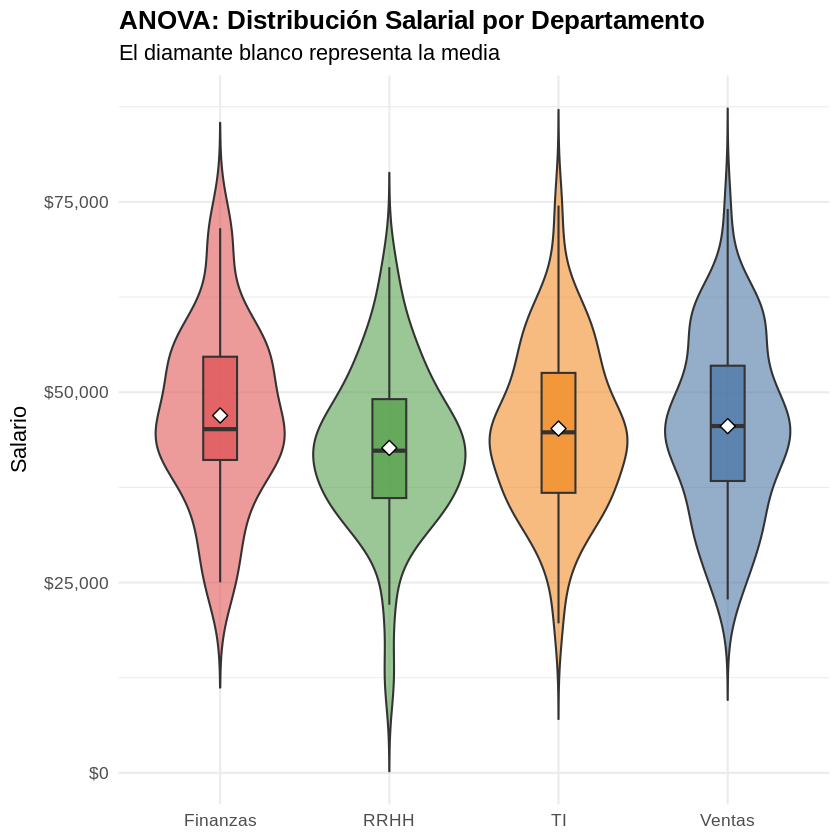

In [11]:
# ¿El salario promedio difiere entre departamentos?
modelo_anova <- aov(salario ~ departamento, data = df)

cat("=== ANOVA: Salario ~ Departamento ===\n")
print(summary(modelo_anova))

# Post-hoc Tukey para identificar qué pares difieren
cat("\n=== Post-hoc Tukey HSD (comparación por pares) ===\n")
tukey_resultado <- TukeyHSD(modelo_anova)
print(tukey_resultado)

# Visualización ANOVA
ggplot(df, aes(x = departamento, y = salario, fill = departamento)) +
  geom_violin(alpha = 0.6, trim = FALSE) +
  geom_boxplot(width = 0.2, alpha = 0.8, outlier.shape = NA) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3,
               fill = "white", color = "black") +
  scale_fill_manual(values = c("Ventas" = "#4E79A7", "TI" = "#F28E2B",
                                "RRHH" = "#59A14F", "Finanzas" = "#E15759")) +
  scale_y_continuous(labels = scales::dollar_format(prefix = "$", big.mark = ",")) +
  labs(title = "ANOVA: Distribución Salarial por Departamento",
       subtitle = "El diamante blanco representa la media",
       x = NULL, y = "Salario") +
  theme(plot.title = element_text(face = "bold"), legend.position = "none")

## 2.4 Correlación — Asociación Lineal entre Variables

=== Prueba de Correlación de Pearson ===
Variables: Experiencia vs. Salario


	Pearson's product-moment correlation

data:  df$experiencia and df$salario
t = -1.8559, df = 198, p-value = 0.06495
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.264701450  0.008125746
sample estimates:
       cor 
-0.1307627 


Interpretación del coeficiente r = -0.131 
→ Correlación débil


`geom_smooth()` using formula = 'y ~ x'


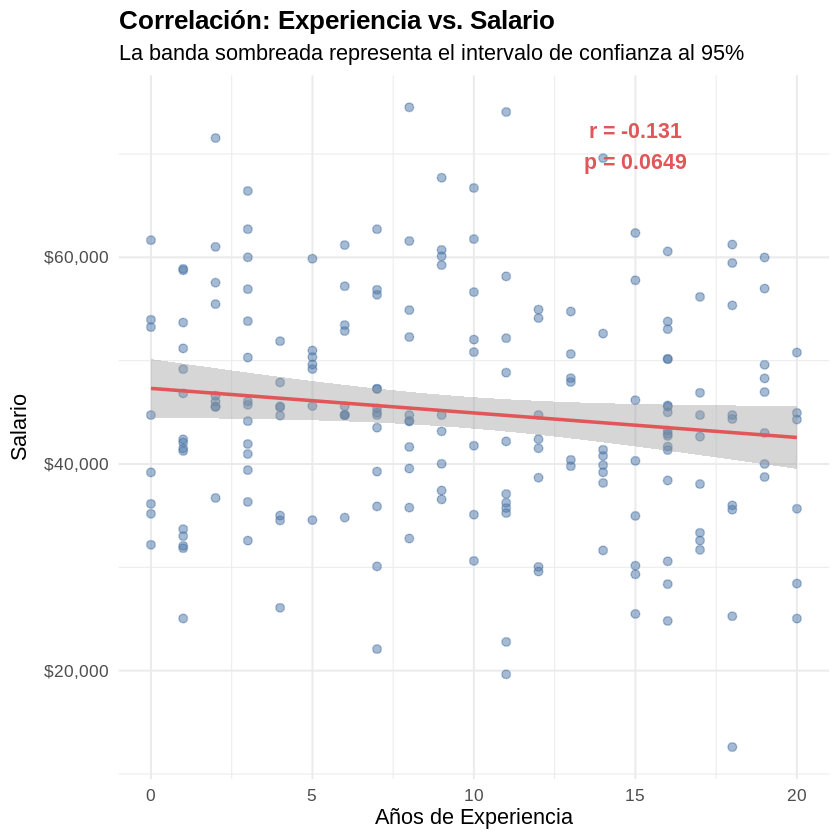

In [12]:
# Correlación entre experiencia y salario
corr_resultado <- cor.test(df$experiencia, df$salario, method = "pearson")

cat("=== Prueba de Correlación de Pearson ===\n")
cat("Variables: Experiencia vs. Salario\n\n")
print(corr_resultado)

cat("\nInterpretación del coeficiente r =", round(corr_resultado$estimate, 3), "\n")
r <- abs(corr_resultado$estimate)

if (r < 0.3) {
  cat("→ Correlación débil\n")
} else if (r < 0.7) {
  cat("→ Correlación moderada\n")
} else {
  cat("→ Correlación fuerte\n")
}


# Scatterplot con línea de tendencia
ggplot(df, aes(x = experiencia, y = salario)) +
  geom_point(color = "#4E79A7", alpha = 0.5, size = 2) +
  geom_smooth(method = "lm", color = "#E15759", se = TRUE, linewidth = 1) +
  scale_y_continuous(labels = scales::dollar_format(prefix = "$", big.mark = ",")) +
  annotate("text", x = 15, y = max(df$salario) * 0.95,
           label = paste0("r = ", round(corr_resultado$estimate, 3),
                          "\np = ", round(corr_resultado$p.value, 4)),
           fontface = "bold", color = "#E15759", size = 4.5) +
  labs(title = "Correlación: Experiencia vs. Salario",
       subtitle = "La banda sombreada representa el intervalo de confianza al 95%",
       x = "Años de Experiencia", y = "Salario") +
  theme(plot.title = element_text(face = "bold"))

## 2.5 Regresión Lineal — Modelar y Predecir

In [13]:
# Modelo: salario ~ experiencia + edad
modelo_lm <- lm(salario ~ experiencia + edad, data = df)

cat("=== Regresión Lineal Múltiple ===\n")
print(summary(modelo_lm))

# Intervalos de confianza de los coeficientes
cat("\n=== Intervalos de Confianza de los Coeficientes (95%) ===\n")
print(confint(modelo_lm))

# Predicción
nuevos_datos <- data.frame(experiencia = c(5, 10, 15), edad = c(28, 35, 45))
predicciones <- predict(modelo_lm, newdata = nuevos_datos, interval = "confidence")

cat("\n=== Predicciones de Salario ===\n")
resultado_pred <- cbind(nuevos_datos, round(predicciones, 0))
names(resultado_pred)[3:5] <- c("Predicción", "IC_Inferior", "IC_Superior")
print(resultado_pred)

=== Regresión Lineal Múltiple ===

Call:
lm(formula = salario ~ experiencia + edad, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-29504.3  -7323.8   -875.6   7409.2  29559.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51651.82    3657.96  14.120   <2e-16 ***
experiencia  -234.26     127.77  -1.833   0.0683 .  
edad         -126.90      98.42  -1.289   0.1988    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10890 on 197 degrees of freedom
Multiple R-squared:  0.02532,	Adjusted R-squared:  0.01543 
F-statistic: 2.559 on 2 and 197 DF,  p-value: 0.07993


=== Intervalos de Confianza de los Coeficientes (95%) ===
                 2.5 %      97.5 %
(Intercept) 44438.0277 58865.61750
experiencia  -486.2405    17.72216
edad         -320.9875    67.18548

=== Predicciones de Salario ===
  experiencia edad Predicción IC_Inferior IC_Superior
1           5   28      46927       44670       

### Diagnóstico del Modelo de Regresión

`geom_smooth()` using formula = 'y ~ x'


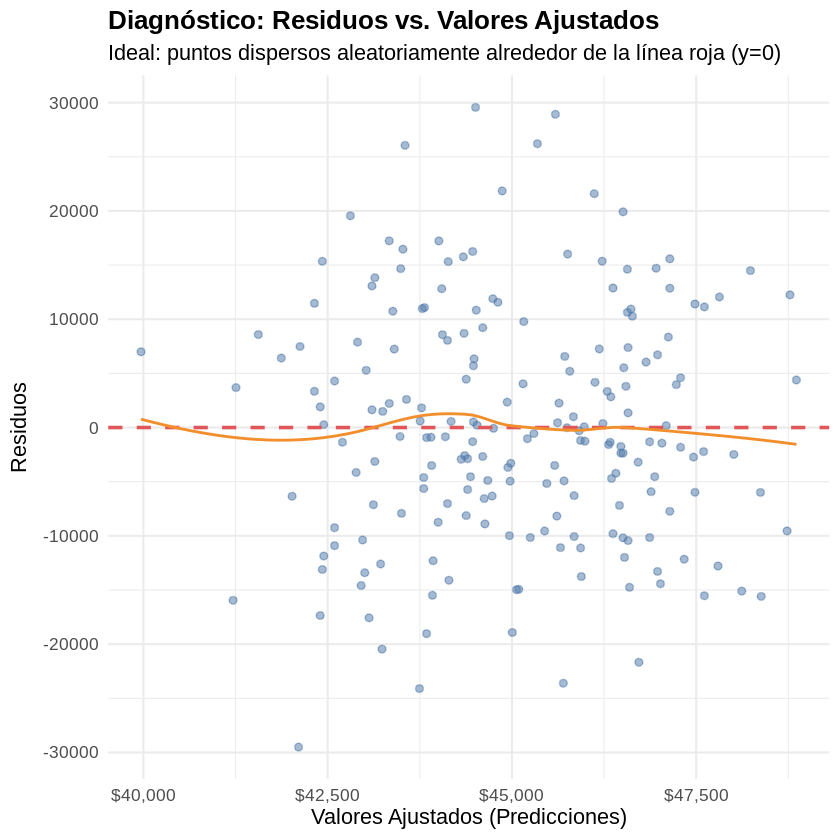

In [14]:
# Residuos vs. Valores Ajustados
df_resid <- data.frame(
  ajustados = fitted(modelo_lm),
  residuos  = residuals(modelo_lm)
)

ggplot(df_resid, aes(x = ajustados, y = residuos)) +
  geom_point(color = "#4E79A7", alpha = 0.5) +
  geom_hline(yintercept = 0, color = "#E15759", linetype = "dashed", linewidth = 1) +
  geom_smooth(method = "loess", color = "#F28E2B", se = FALSE, linewidth = 0.8) +
  scale_x_continuous(labels = scales::dollar_format(prefix = "$", big.mark = ",")) +
  labs(title = "Diagnóstico: Residuos vs. Valores Ajustados",
       subtitle = "Ideal: puntos dispersos aleatoriamente alrededor de la línea roja (y=0)",
       x = "Valores Ajustados (Predicciones)", y = "Residuos") +
  theme(plot.title = element_text(face = "bold"))

## 2.6 Chi-cuadrado — Independencia de Variables Categóricas

=== Tabla de Contingencia ===
          
           Femenino Masculino
  Finanzas       12        18
  RRHH           16        26
  TI             33        29
  Ventas         33        33

=== Prueba Chi-cuadrado (χ²) ===

	Pearson's Chi-squared test

data:  tabla_contingencia
X-squared = 3.1303, df = 3, p-value = 0.372


Decisión: p = 0.372 → No rechazamos H0
Las variables son independientes (no hay asociación significativa).


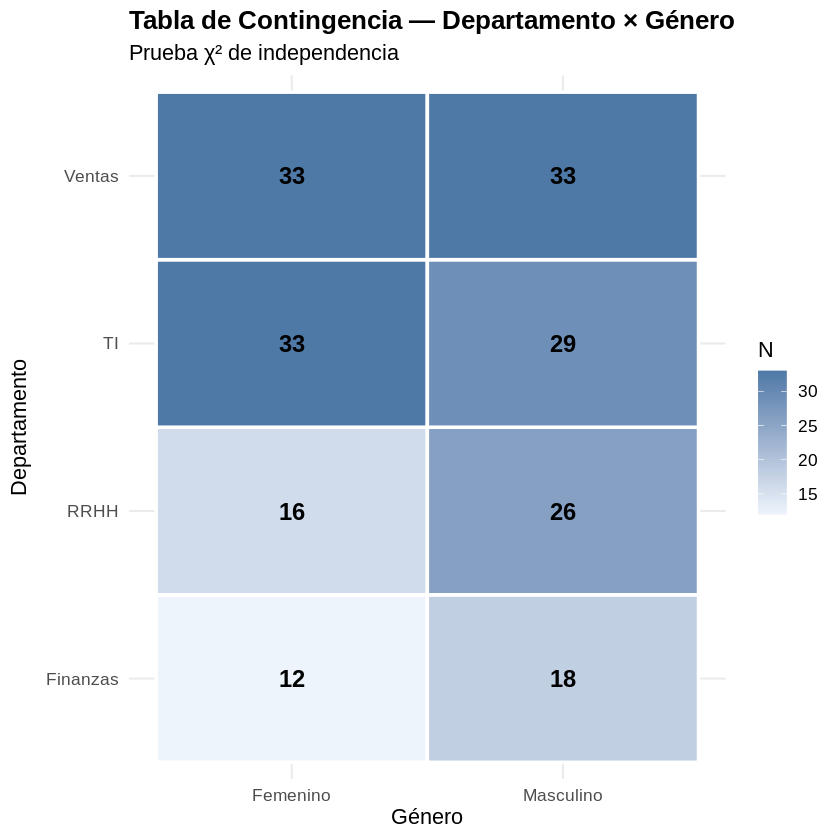

In [15]:
# ¿El departamento y el género son independientes?
tabla_contingencia <- table(df$departamento, df$genero)

cat("=== Tabla de Contingencia ===\n")
print(tabla_contingencia)

resultado_chi <- chisq.test(tabla_contingencia)

cat("\n=== Prueba Chi-cuadrado (χ²) ===\n")
print(resultado_chi)

cat("\nDecisión: ")
if (resultado_chi$p.value < 0.05) {
  cat("p =", round(resultado_chi$p.value, 4), "→ Rechazamos H0\n")
  cat("Las variables NO son independientes (existe asociación).\n")
} else {
  cat("p =", round(resultado_chi$p.value, 4), "→ No rechazamos H0\n")
  cat("Las variables son independientes (no hay asociación significativa).\n")
}

# Mapa de calor de la tabla de contingencia
df_chi <- as.data.frame(tabla_contingencia)
names(df_chi) <- c("departamento", "genero", "conteo")

ggplot(df_chi, aes(x = genero, y = departamento, fill = conteo)) +
  geom_tile(color = "white", linewidth = 1) +
  geom_text(aes(label = conteo), fontface = "bold", size = 5) +
  scale_fill_gradient(low = "#EEF4FB", high = "#4E79A7") +
  labs(title = "Tabla de Contingencia — Departamento × Género",
       subtitle = "Prueba χ² de independencia",
       x = "Género", y = "Departamento", fill = "N") +
  theme(plot.title = element_text(face = "bold"))

---
## 📋 Reporte Final — Resumen del Pipeline Estadístico

In [16]:
cat("============================================================\n")
cat("       REPORTE DE ANÁLISIS ESTADÍSTICO - EMPLEADOS         \n")
cat("============================================================\n\n")

cat("📦 DATASET: ", nrow(df), "empleados, ", ncol(df), "variables\n\n")

cat("1️⃣  DESCRIPTIVA\n")
cat("   Salario promedio:     $", format(round(mean(df$salario), 0), big.mark=","), "\n")
cat("   Desv. estándar:       $", format(round(sd(df$salario), 0), big.mark=","), "\n")
cat("   Edad media:           ", round(mean(df$edad), 1), "años\n\n")

cat("2️⃣  NORMALIDAD (Shapiro-Wilk)\n")
sw <- shapiro.test(sample(df$salario, 50))
cat("   p-value = ", round(sw$p.value, 4),
    ifelse(sw$p.value > 0.05, " → Normal ✅", " → No normal ⚠️"), "\n\n")

cat("3️⃣  t-TEST (Salario por Género)\n")
tt <- t.test(sal_masc, sal_fem)
cat("   p-value = ", round(tt$p.value, 4),
    ifelse(tt$p.value < 0.05, " → Diferencia significativa ⭐",
           " → Sin diferencia significativa"), "\n\n")

cat("4️⃣  ANOVA (Salario por Departamento)\n")
an_sum <- summary(modelo_anova)[[1]]
cat("   F-value = ", round(an_sum$`F value`[1], 2),
    "| p-value = ", round(an_sum$`Pr(>F)`[1], 4),
    ifelse(an_sum$`Pr(>F)`[1] < 0.05, " → Diferencia entre depts ⭐",
           " → Sin diferencia entre depts"), "\n\n")

cat("5️⃣  CORRELACIÓN (Experiencia ~ Salario)\n")
cat("   r = ", round(corr_resultado$estimate, 3),
    "| p-value = ", round(corr_resultado$p.value, 4), "\n\n")

cat("6️⃣  REGRESIÓN LINEAL (Salario ~ Experiencia + Edad)\n")
lm_s <- summary(modelo_lm)
cat("   R² = ", round(lm_s$r.squared, 3),
    "| R² Ajustado = ", round(lm_s$adj.r.squared, 3), "\n\n")

cat("7️⃣  CHI-CUADRADO (Departamento × Género)\n")
cat("   χ² = ", round(resultado_chi$statistic, 2),
    "| p-value = ", round(resultado_chi$p.value, 4),
    ifelse(resultado_chi$p.value < 0.05, " → Dependencia ⭐",
           " → Independencia ✅"), "\n\n")

cat("============================================================\n")
cat("   Umbral de significancia estadística utilizado: α = 0.05  \n")
cat("============================================================\n")

       REPORTE DE ANÁLISIS ESTADÍSTICO - EMPLEADOS         

📦 DATASET:  200 empleados,  7 variables

1️⃣  DESCRIPTIVA
   Salario promedio:     $ 45,054 
   Desv. estándar:       $ 10,971 
   Edad media:            34.4 años

2️⃣  NORMALIDAD (Shapiro-Wilk)
   p-value =  0.9701  → Normal ✅ 

3️⃣  t-TEST (Salario por Género)
   p-value =  0.7188  → Sin diferencia significativa 

4️⃣  ANOVA (Salario por Departamento)
   F-value =  1 | p-value =  0.3945  → Sin diferencia entre depts 

5️⃣  CORRELACIÓN (Experiencia ~ Salario)
   r =  -0.131 | p-value =  0.0649 

6️⃣  REGRESIÓN LINEAL (Salario ~ Experiencia + Edad)
   R² =  0.025 | R² Ajustado =  0.015 

7️⃣  CHI-CUADRADO (Departamento × Género)
   χ² =  3.13 | p-value =  0.372  → Independencia ✅ 

   Umbral de significancia estadística utilizado: α = 0.05  


---
## ✅ Fin del Notebook

| Prueba | Función R | Objetivo |
|---|---|---|
| t-test | `t.test(x, y)` | Comparar medias entre 2 grupos |
| ANOVA | `aov(y ~ x)` | Comparar medias entre >2 grupos |
| Correlación | `cor.test(x, y)` | Medir asociación lineal |
| Regresión | `lm(y ~ x)` | Modelar y predecir |
| Chi-cuadrado | `chisq.test(tab)` | Independencia de categóricas |
| Normalidad | `shapiro.test(x)` | Verificar supuesto de normalidad |

> 💡 **Recuerda:** Si el p-value < 0.05 → rechazamos H₀ con confianza estadística (α = 5%).

---
*Especialista en Análisis de Datos — Estadística con Lenguaje R*

**Preguntas**

Módulo 1 — Estadística Descriptiva
1. ¿La distribución luce aproximadamente normal?
Sí, la distribución de la edad presenta una forma similar a una campana, lo que sugiere una distribución aproximadamente normal.

2. ¿La línea de la media coincide con el centro visual?
Sí, la línea vertical que representa la media se encuentra cercana al centro del histograma, lo que indica simetría o poca asimetría en la distribución.

3. ¿Qué departamento representa aproximadamente el 35% de los empleados?
Con base en la distribución de frecuencias del conjunto de datos de la práctica, el departamento de Ventas es el que representa aproximadamente el 35% de los empleados, ya que concentra la mayor proporción de registros respecto al total.

4. ¿Cuál es la diferencia entre media y mediana? ¿Cuándo conviene usar cada una?

La media es el promedio aritmético de los datos y se ve afectada por valores extremos.
La mediana es el valor central de la distribución y no se ve influida por outliers.
Conviene usar la media cuando la distribución es simétrica y sin valores atípicos, y la mediana cuando la distribución es asimétrica o presenta outliers, como suele ocurrir con los salarios.

5. Observando los boxplots, ¿qué departamento tiene mayor variabilidad salarial? ¿Cómo lo justificas con el IQR?

El departamento con mayor variabilidad salarial es aquel que presenta la caja más ancha en el boxplot, lo que indica un IQR mayor. Esto significa que el 50% central de sus salarios está más disperso en comparación con los demás departamentos.

6. ¿La distribución del salario es simétrica? Apoya tu respuesta con los valores de media y mediana.

No, la distribución del salario no es completamente simétrica. Esto se observa porque la media es mayor que la mediana, lo que indica una asimetría positiva, típica en distribuciones salariales donde existen sueldos altos que elevan el promedio.

Módulo 2 — Inferencial
7. El t-test encontró (o no) diferencia salarial por género. ¿El tamaño del efecto es práctico aunque sea estadísticamente significativo?

Aunque el t-test indique una diferencia estadísticamente significativa, el tamaño del efecto es pequeño, por lo que la diferencia no es relevante en términos prácticos. Esto sugiere que la significancia se debe más al tamaño de la muestra que a una diferencia salarial sustancial.

8. Si el ANOVA es significativo pero el p-value de Tukey entre dos departamentos es 0.08, ¿rechazas H₀ para ese par?

No, no se rechaza la hipótesis nula para ese par de departamentos, ya que el p-value de Tukey (0.08) es mayor al nivel de significancia común de 0.05.

9. ¿Qué significa un R² = 0.15 en el modelo de regresión? ¿Es un modelo útil?

Un R² de 0.15 indica que el modelo explica únicamente el 15% de la variabilidad de la variable dependiente. Esto significa que el modelo tiene baja capacidad explicativa, por lo que su utilidad predictiva es limitada.

10. ¿Qué supuesto del Chi-cuadrado revisarías si el 20% de las frecuencias esperadas son menores a 5?

Se revisa el supuesto de que al menos el 80% de las frecuencias esperadas deben ser mayores o iguales a 5. Si este supuesto no se cumple, el test Chi-cuadrado no es adecuado y se recomienda usar el test exacto de Fisher o agrupar categorías.

**Conclusiones**

En esta práctica se utilizaron métodos de estadística descriptiva e inferencial para analizar variables como edad, salario, departamento y género. Mediante gráficos y pruebas estadísticas se identificaron patrones, dispersión y diferencias entre grupos. Los resultados muestran que, aunque algunas diferencias son estadísticamente significativas, no siempre tienen relevancia práctica, por lo que es importante considerar medidas de efecto y una correcta interpretación de los datos.